<a href="https://colab.research.google.com/github/Jaskaran7d5/BCS-secy-recruitment/blob/main/Sorry_tuning_part_1_Jaskaransingh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [ ]:

#importing libraries
import numpy as np

%matplotlib inline
#to use as command line calls #using inline graphs will come next to code

import matplotlib.pyplot as plt #for graphs
import os #for operating system dependent fucntionality
from keras import layers #for building layers of neural net
from keras.models import Model
from keras.models import load_model
from keras import callbacks #for training logs, saving to disk periodically
import cv2 #OpenCV(Open Source computer vision lib), containg CV algos
import string


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/CaptchaDataset/dataset1/mapping.csv')

In [ ]:
df.head()

,file_name,captcha
0,1.png,p5g5m
1,2.png,e72cd
2,3.png,pgmn2
3,4.png,6cm6m
4,5.png,68wfd


In [ ]:
data = df.to_numpy()

In [ ]:
dic = df.to_dict()

In [ ]:
data

array([['1.png', 'p5g5m'],
       ['2.png', 'e72cd'],
       ['3.png', 'pgmn2'],
       ...,
       ['1068.png', 'b28g8'],
       ['1069.png', '6p7gx'],
       ['1070.png', 'gfp54']], dtype=object)

In [ ]:
data.shape

(1070, 2)

In [ ]:
imgshape=(50,200,1)

In [ ]:
nchar = 36
n=1070

In [ ]:
character = 'abcdefghijklmnopqrstuvwxyz1234567890'

In [ ]:
X = np.zeros((n,50,200,1)) #1070*50*200 array with all entries 0
y = np.zeros((6,n,nchar)) #5*1070*36(5 letters in captcha) with all entries 0

for i in range(0,1070):
    if i==72 or i==1070:
      continue
  #i represents index no. of image in directory
  #pic contains the file name of the particular image to be preprocessed at a time

    img = cv2.imread(os.path.join("/content/drive/MyDrive/CaptchaDataset/dataset1/images", data[i,0]), cv2.IMREAD_GRAYSCALE) #Read image in grayscale format
    pic_target = data[i,0][:-4]#this drops the .png extension from file name and contains only the captcha for training
    print(f"i is {i} while pic is {data[i,0]}")

    img = img / 255.0 #scales the image between 0 and 1
    img = np.reshape(img, (50, 200, 1)) #reshapes image to width 200 , height 50 ,channel 1

    target=np.zeros((6,nchar)) #creates an array of size 5*36 with all entries 0

    for j, k in enumerate(data[i,1]):
      #j iterates from 0 to 4(5 letters in captcha)
      #k denotes the letter in captcha which is to be scanned
         print(f"char is {k}")
         index = character.find(k) #index stores the position of letter k of captcha in the character string
         target[j, index] = 1 #replaces 0 with 1 in the target array at the position of the letter in captcha

    X[i] = img #stores all the images
    y[:,i] = target #stores all the info about the letters in captcha of all images

Streaming output truncated to the last 5000 lines.
char is n
char is 8
i is 237 while pic is 238.png
char is n
char is f
char is b
char is g
char is 8
i is 238 while pic is 239.png
char is p
char is n
char is 7
char is p
char is n
i is 239 while pic is 240.png
char is x
char is y
char is n
char is c
char is c
i is 240 while pic is 241.png
char is p
char is e
char is 4
char is x
char is n
i is 241 while pic is 242.png
char is d
char is d
char is c
char is d
char is d
i is 242 while pic is 243.png
char is x
char is 7
char is 4
char is b
char is 2
i is 243 while pic is 244.png
char is c
char is x
char is 3
char is w
char is g
i is 244 while pic is 245.png
char is 5
char is m
char is f
char is 7
char is c
i is 245 while pic is 246.png
char is n
char is 5
char is w
char is b
char is g
i is 246 while pic is 247.png
char is 7
char is w
char is 6
char is 7
char is m
i is 247 while pic is 248.png
char is d
char is f
char is n
char is x
char is 4
i is 248 while pic is 249.png
char is 6
char is c

In [ ]:
def createmodel():
    img = layers.Input(shape=imgshape) # Get image as an input of size 50,200,1
    conv1 = layers.Conv2D(16, (3, 3), padding='same', activation='relu')(img) #50*200
    mp1 = layers.MaxPooling2D(padding='same')(conv1)  # 25*100
    conv2 = layers.Conv2D(32, (3, 3), padding='same', activation='relu')(mp1)
    mp2 = layers.MaxPooling2D(padding='same')(conv2)  # 13*50
    conv3 = layers.Conv2D(32, (3, 3), padding='same', activation='relu')(mp2)
    bn = layers.BatchNormalization()(conv3) #to improve the stability of model
    mp3 = layers.MaxPooling2D(padding='same')(bn)  # 7*25

    flat = layers.Flatten()(mp3) #convert the layer into 1-D

    outs = []
    for _ in range(5): #for 5 letters of captcha
        dens1 = layers.Dense(64, activation='relu')(flat)
        drop = layers.Dropout(0.5)(dens1) #drops 0.5 fraction of nodes
        res = layers.Dense(nchar, activation='sigmoid')(drop)

        outs.append(res) #result of layers

    # Compile model and return it
    model = Model(img, outs) #create model
    model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=["accuracy"])
    return model



In [ ]:
model=createmodel();
model.summary();

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 50, 200, 1)]         0         []                            
                                                                                                  
 conv2d_6 (Conv2D)           (None, 50, 200, 16)          160       ['input_3[0][0]']             
                                                                                                  
 max_pooling2d_6 (MaxPoolin  (None, 25, 100, 16)          0         ['conv2d_6[0][0]']            
 g2D)                                                                                             
                                                                                                  
 conv2d_7 (Conv2D)           (None, 25, 100, 32)          4640      ['max_pooling2d_6[0][0]'

In [ ]:
X_train, y_train = X[:970], y[:, :970]
X_test, y_test = X[970:], y[:, 970:]

In [ ]:
X_train[0].shape

(50, 200, 1)

In [ ]:
y.shape

(6, 1070, 36)

In [ ]:
hist = model.fit(X_train, [y_train[0], y_train[1], y_train[2], y_train[3], y_train[4]], batch_size=32, epochs=30, validation_split=0.2)

Epoch 1/30
25/25 [==============================] - 21s 649ms/step - loss: 17.6467 - dense_21_loss: 3.5656 - dense_23_loss: 3.5307 - dense_25_loss: 3.5785 - dense_27_loss: 3.4988 - dense_29_loss: 3.4732 - dense_21_accuracy: 0.0528 - dense_23_accuracy: 0.0747 - dense_25_accuracy: 0.0438 - dense_27_accuracy: 0.0567 - dense_29_accuracy: 0.0644 - val_loss: 17.7416 - val_dense_21_loss: 3.5453 - val_dense_23_loss: 3.5501 - val_dense_25_loss: 3.5460 - val_dense_27_loss: 3.5458 - val_dense_29_loss: 3.5545 - val_dense_21_accuracy: 0.1340 - val_dense_23_accuracy: 0.1443 - val_dense_25_accuracy: 0.0928 - val_dense_27_accuracy: 0.0876 - val_dense_29_accuracy: 0.0567
Epoch 2/30
25/25 [==============================] - 9s 357ms/step - loss: 16.1853 - dense_21_loss: 3.1692 - dense_23_loss: 3.2994 - dense_25_loss: 3.2697 - dense_27_loss: 3.1802 - dense_29_loss: 3.2668 - dense_21_accuracy: 0.1211 - dense_23_accuracy: 0.1018 - dense_25_accuracy: 0.0915 - dense_27_accuracy: 0.0928 - dense_29_accuracy: 0.

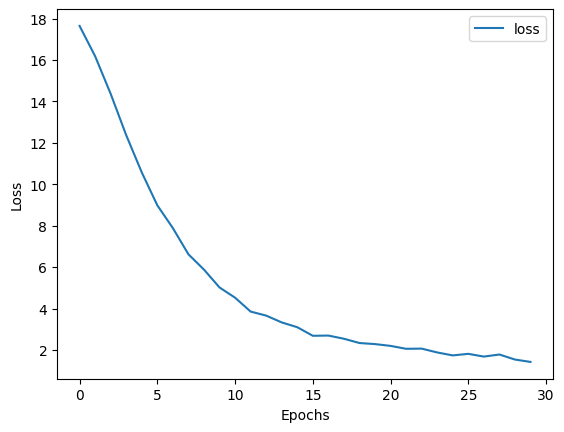

In [ ]:
#graph of loss vs epochs
for label in ["loss"]:
  plt.plot(hist.history[label],label=label)
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [ ]:
def predict(filepath):
    img = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)

    if img is not None: #image foud at file path
        img = img / 255.0 #Scale image
    else:
        print("Not detected");

    res = np.array(model.predict(img[np.newaxis, :, :, np.newaxis])) #np.newaxis=1
    #added this bcoz x_train 970*50*200*1
    #returns array of size 1*5*36
    result = np.reshape(res, (5, 36)) #reshape the array
    k_ind = []
    probs = []
    for i in result:
        k_ind.append(np.argmax(i)) #adds the index of the char found in captcha

    capt = '' #string to store predicted captcha
    for k in k_ind:
        capt += character[k] #finds the char corresponding to the index
    return capt


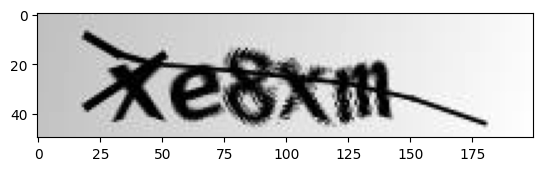

In [ ]:
img=cv2.imread('/content/drive/MyDrive/CaptchaDataset/dataset1/images/1002.png',cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap=plt.get_cmap('gray'))

In [ ]:
print("Predicted Captcha =",predict('/content/drive/MyDrive/CaptchaDataset/dataset1/images/1002.png'))

1/1 [==============================] - 0s 123ms/step
Predicted Captcha = xe8xm
